# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import time
import requests
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
import requests
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0
    
    params = {
        "appid": weather_api_key,
        "q": city,
        "units": unit
    }
    
    try:
        response = requests.get(url, params=params).json()
        # Log the url, record, and set numbers
        print(f"Processing Record {record_count} of Set {set_count} | {city}")

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_info = {
            "City": city,
            "Lat": response["coord"]["lat"],
            "Lng": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Cloudiness": response["clouds"]["all"],
            "Wind Speed": response["wind"]["speed"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        }
        
        city_data.append(city_info)
        
        # Add 1 to the record count
        record_count += 1
    except:
        print("City not found. Skipping...")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ulsteinvik
Processing Record 2 of Set 1 | berezovo
Processing Record 3 of Set 1 | sungai penuh
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | aykhal
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | alexandria
Processing Record 9 of Set 1 | tura
Processing Record 10 of Set 1 | sandnessjoen
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | pirallahi
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | wanning
Processing Record 18 of Set 1 | kikwit
Processing Record 19 of Set 1 | kovdor
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | howrah
Processing Record

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())
city_data_df

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ulsteinvik,62.3432,5.8487,4.62,86,99,2.24,NO,1703875878
1,berezovo,63.9381,65.0419,-7.04,93,100,10.06,RU,1703875879
2,sungai penuh,-2.0833,101.3833,18.53,98,77,1.21,ID,1703875879
3,touros,-5.1989,-35.4608,28.55,63,17,6.54,BR,1703875880
4,aykhal,66.0000,111.5000,-28.87,96,100,3.71,RU,1703875880
...,...,...,...,...,...,...,...,...,...
572,saint-francois,46.4154,3.9054,9.26,95,100,1.54,FR,1703876057
573,high river,50.5834,-113.8687,5.61,64,82,1.79,CA,1703876058
574,bandiagara,14.3501,-3.6104,24.02,11,0,3.54,ML,1703876058
575,rawah,34.4816,41.9093,12.88,53,0,2.32,IQ,1703876058


In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ulsteinvik,62.3432,5.8487,4.62,86,99,2.24,NO,1703875878
1,berezovo,63.9381,65.0419,-7.04,93,100,10.06,RU,1703875879
2,sungai penuh,-2.0833,101.3833,18.53,98,77,1.21,ID,1703875879
3,touros,-5.1989,-35.4608,28.55,63,17,6.54,BR,1703875880
4,aykhal,66.0000,111.5000,-28.87,96,100,3.71,RU,1703875880


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulsteinvik,62.3432,5.8487,4.62,86,99,2.24,NO,1703875878
1,berezovo,63.9381,65.0419,-7.04,93,100,10.06,RU,1703875879
2,sungai penuh,-2.0833,101.3833,18.53,98,77,1.21,ID,1703875879
3,touros,-5.1989,-35.4608,28.55,63,17,6.54,BR,1703875880
4,aykhal,66.0000,111.5000,-28.87,96,100,3.71,RU,1703875880


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

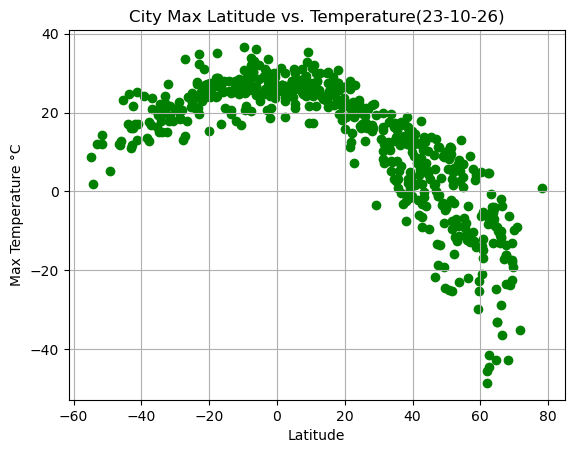

In [80]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],color="green",)


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature(23-10-26)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

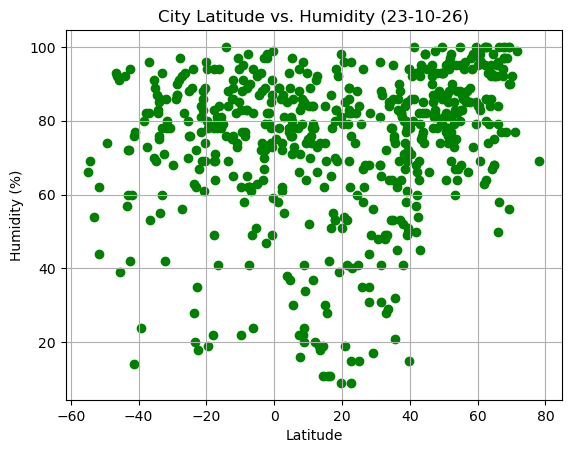

In [39]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],color="green")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (23-10-26)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

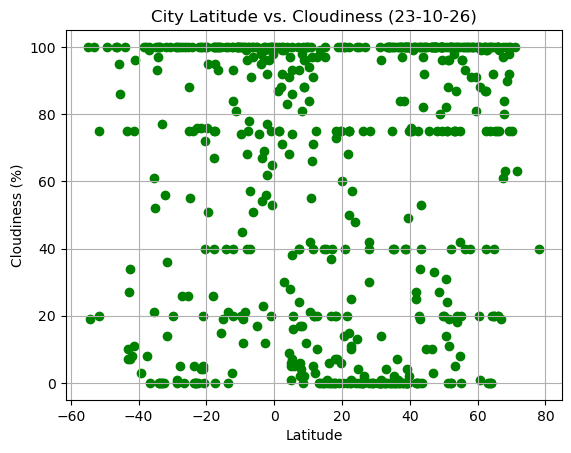

In [40]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],color="green")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (23-10-26)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

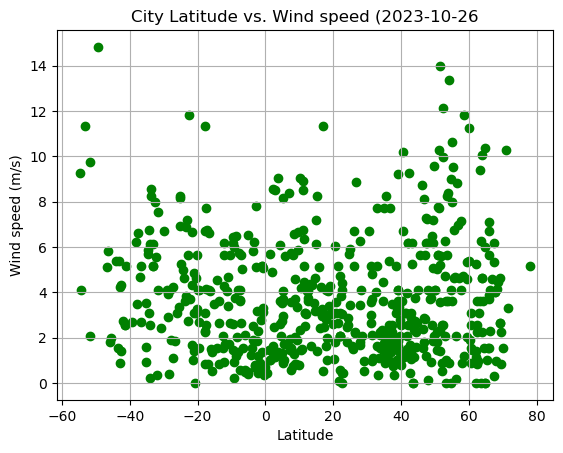

In [41]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],color="green")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind speed (2023-10-26")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.grid(visible=True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def linear_regression(data, x, y, x_label, y_label, title, output_file):
    """
    Plotting the Data with  Linear Regression and save the plotted figures as .pngs
        
    Parameters
    ----------
        data — The dataframe to use
        x — The name of the column to use for the x axis
        y — The name of the column to use for the x axis
        x_label — The label for the x axis data
        y_label — The label for the y axis data
        title — The title for the plot
        output_file — The name of the saved output file
    """
    (slope, intercept, rvalue, pvalue, stderr) = linregress(data[x], data[y])
    regress_values = data[x] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    fig = data.plot.scatter(x, y, alpha=0.5)
    fig.set_title(f'{title} ({time.strftime("%m/%d/%y")})', fontsize=(12))
    fig.set_xlabel(x_label, fontsize=(12))
    fig.set_ylabel(y_label, fontsize=(12))
    
    fig.plot(data[x], regress_values, 'r-')
    fig.annotate(line_eq, (data[x].min(), data[y].min()), fontsize=20, color="red")
    
    plt.savefig('./output_data/' + output_file + '.png')
    plt.show()
    
    print(f'The r-value is: {rvalue**2:.2f}')

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulsteinvik,62.3432,5.8487,4.62,86,99,2.24,NO,1703875878
1,berezovo,63.9381,65.0419,-7.04,93,100,10.06,RU,1703875879
4,aykhal,66.0000,111.5000,-28.87,96,100,3.71,RU,1703875880
6,talnakh,69.4865,88.3972,-19.28,90,100,0.82,RU,1703875881
7,alexandria,31.2156,29.9553,16.30,68,0,3.59,EG,1703875766


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sungai penuh,-2.0833,101.3833,18.53,98,77,1.21,ID,1703875879
3,touros,-5.1989,-35.4608,28.55,63,17,6.54,BR,1703875880
5,west island,-12.1568,96.8225,26.99,89,40,5.66,CC,1703875881
10,grytviken,-54.2811,-36.5092,1.78,69,19,4.10,GS,1703875882
12,adamstown,-25.0660,-130.1015,22.58,76,88,8.14,PN,1703875883


###  Temperature vs. Latitude Linear Regression Plot

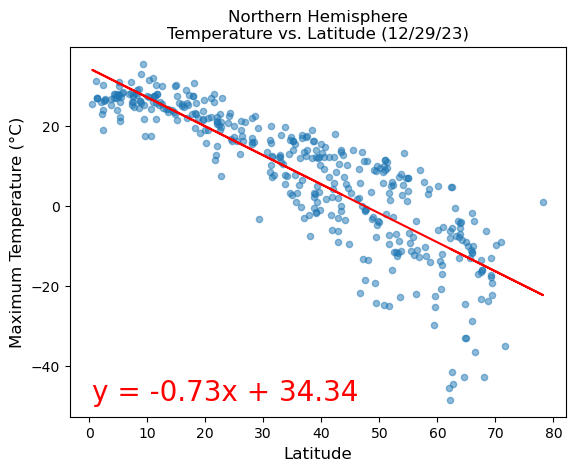

The r-value is: 0.74


In [81]:
# Linear regression on Northern Hemisphere
linear_regression(
    northern_hemi_df,
    'Lat',
    'Max Temp',
    'Latitude',
    'Maximum Temperature (°C)', 
    'Northern Hemisphere\nTemperature vs. Latitude',
    'NorthHemiSphere_TempVLat'
)

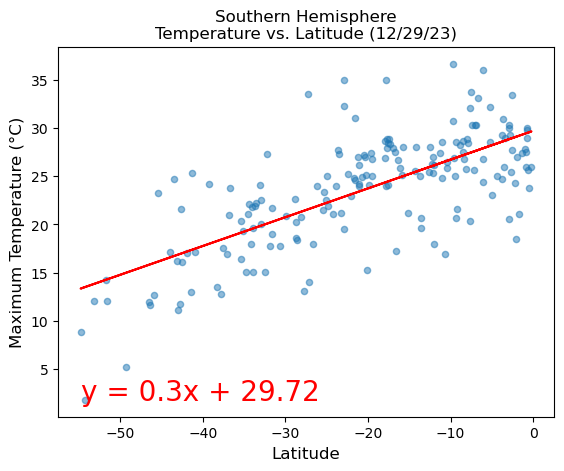

The r-value is: 0.50


In [82]:
# Linear regression on Southern Hemisphere
linear_regression(
    southern_hemi_df,
    'Lat',
    'Max Temp',
    'Latitude',
    'Maximum Temperature (°C)', 
    'Southern Hemisphere\nTemperature vs. Latitude',
    'SouthHemiSphere_TempVLat'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

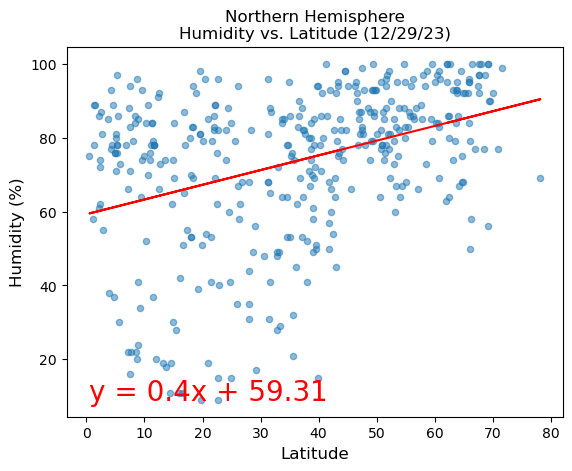

The r-value is: 0.14


In [83]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df,
    'Lat',
    'Humidity',
    'Latitude',
    'Humidity (%)', 
    'Northern Hemisphere\nHumidity vs. Latitude',
    'NorthHemiSphere_HumidityVLat'
)

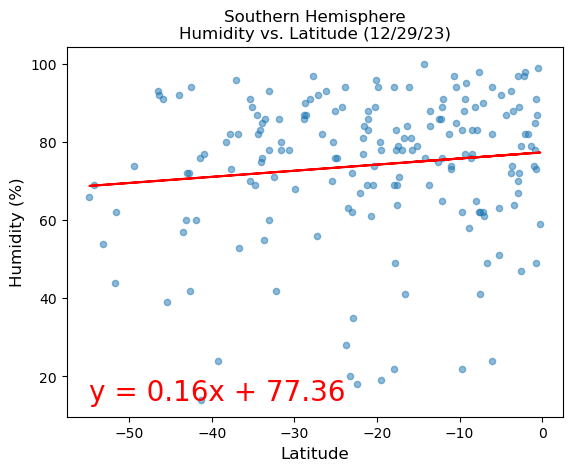

The r-value is: 0.01


In [84]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df,
    'Lat',
    'Humidity',
    'Latitude',
    'Humidity (%)', 
    'Southern Hemisphere\nHumidity vs. Latitude',
    'SouthHemiSphere_HumidityVLat'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

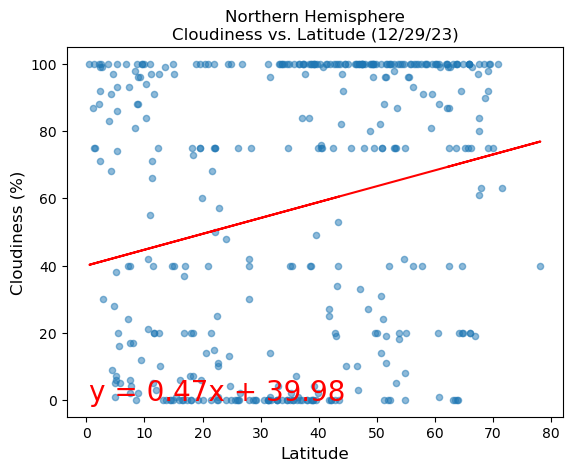

The r-value is: 0.05


In [85]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df,
    'Lat',
    'Cloudiness',
    'Latitude',
    'Cloudiness (%)', 
    'Northern Hemisphere\nCloudiness vs. Latitude',
    'NorthHemiSphere_CloudinessVLat'
)

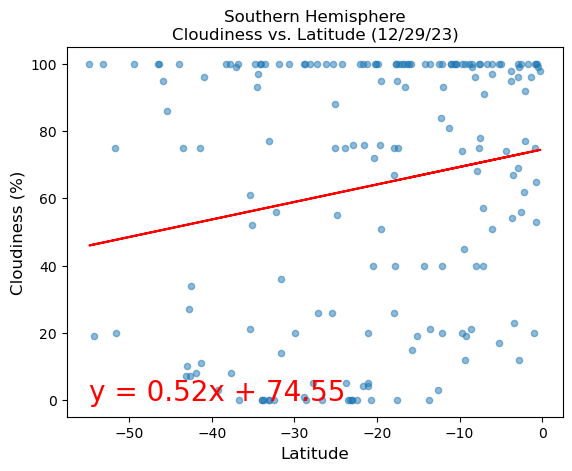

The r-value is: 0.04


In [86]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df,
    'Lat',
    'Cloudiness',
    'Latitude',
    'Cloudiness (%)', 
    'Southern Hemisphere\nCloudiness vs. Latitude',
    'SouthHemiSphere_CloudinessVLat'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

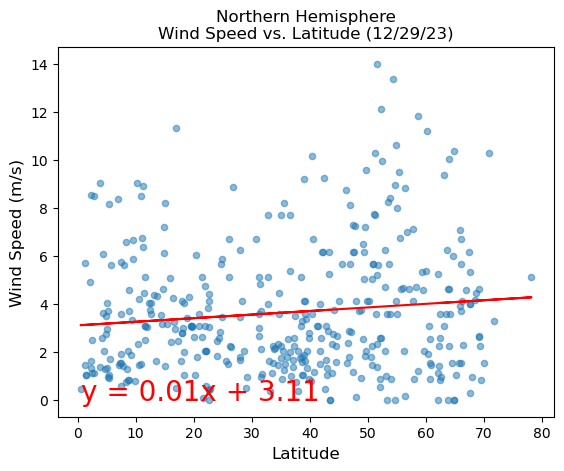

The r-value is: 0.01


In [87]:
# Northern Hemisphere
linear_regression(
    northern_hemi_df,
    'Lat',
    'Wind Speed',
    'Latitude',
    'Wind Speed (m/s)', 
    'Northern Hemisphere\nWind Speed vs. Latitude',
    'NorthHemiSphere_WindSpeedVLat'
)

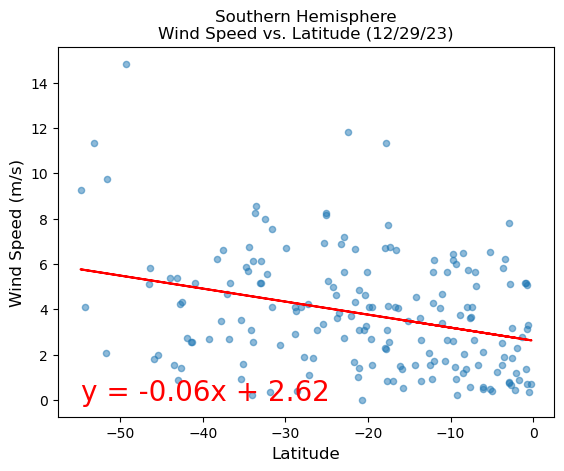

The r-value is: 0.10


In [88]:
# Southern Hemisphere
linear_regression(
    southern_hemi_df,
    'Lat',
    'Wind Speed',
    'Latitude',
    'Wind Speed (m/s)', 
    'Southern Hemisphere\nWind Speed vs. Latitude',
    'SouthHemiSphere_WindSpeedVLat'
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE